In [104]:
import os
import re
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath("../"))
from dataset import DS_DIMENSIONS, DS_NAMES
from utilities.figure_tools import (get_latest_results_directory, load_results,
                                    make_fig_directory)

cmap = plt.get_cmap("Set1")
colors = cmap.colors

results_path = "../results/final/vary_ntrees.csv"
output_dir = "./vary-ntrees/"
export_figures = True
fig_type = ".svg"
use_titles = False
use_legend = True

if export_figures and not os.path.isdir(output_dir):
    os.makedirs(output_dir)

In [105]:
all_results = pd.read_csv(results_path).groupby(["dataset", "explainer", "n_trees"]).mean().reset_index()
print("explainers:", list(all_results["explainer"].unique()))
print("datasets", list(all_results["dataset"].unique()))
all_results.head()

explainers: ['FACETIndex', 'OCEAN']
datasets ['cancer', 'glass', 'magic', 'spambase', 'vertebral']


,dataset,explainer,n_trees,iteration,max_depth,accuracy,precision,recall,f1,per_valid,avg_dist,avg_length,prep_time,explain_time,sample_time,n_explain
0,cancer,FACETIndex,10,4.5,5.0,0.946491,0.940244,0.908325,0.923360,1.0,0.153822,4.325,4.778947,0.400329,0.020016,20.0
1,cancer,FACETIndex,50,4.5,5.0,0.950000,0.944800,0.913592,0.928486,1.0,0.295229,10.005,16.597418,2.257733,0.112887,20.0
2,cancer,FACETIndex,100,4.5,5.0,0.954386,0.949355,0.921485,0.934777,1.0,0.351798,13.085,24.791025,2.964173,0.148209,20.0
3,cancer,FACETIndex,200,4.5,5.0,0.952632,0.950321,0.915766,0.932107,1.0,0.408269,16.375,40.547195,3.467154,0.173358,20.0
4,cancer,FACETIndex,300,4.5,5.0,0.951754,0.946068,0.918091,0.931277,1.0,0.432710,18.155,56.095890,3.744109,0.187205,20.0


In [106]:
all_results["n_trees"].unique()

array([ 10,  50, 100, 200, 300, 400, 500], dtype=int64)

In [107]:
# idx_match = all_results["n_trees"] == 10
# all_results[idx_match].to_csv("temp_table.csv", index=False)

In [108]:
cmap = plt.get_cmap("tab10")
colors = cmap.colors
ds_colors = {
    "cancer": colors[0],
    "glass": colors[1],
    "magic": colors[2],
    "spambase": colors[3],
    "vertebral": colors[4]
}
epl_colors = {
    "AFT": colors[0],
    "FACETIndex": colors[1],
    "OCEAN": colors[2],
    "RFOCSE": colors[3],
    "MACE": colors[4]
}
explainer_markers = {
    "AFT": "o",
    "FACETIndex": "^",
    "OCEAN": "s",
    "RFOCSE": "v",
    "MACE": "D"
}
marker_size = 8
line_width = 2
marker_sizes = {
    "AFT": marker_size,
    "FACETIndex": marker_size,
    "OCEAN": marker_size,
    "RFOCSE": marker_size,
    "MACE": marker_size
}
pretty_explainer_names = {
    "AFT": "AFT",
    "FACETIndex": "FACET",
    "OCEAN": "OCEAN",
    "RFOCSE": "RFOCSE",
    "MACE": "MACE",
}

In [109]:
def render_plot(xfeature, yfeature, xlabel, ylabel, title, save_name=None, xrange=None, yrange=None, xlog=False, lloc=None, ylog=False):

    for ds in all_results["dataset"].unique():
        plt.figure()
        is_ds = all_results["dataset"] == ds
        for expl in all_results["explainer"].unique():
            is_expl = all_results["explainer"] == expl
            matching_rows = is_ds & is_expl
            plt.plot(all_results[matching_rows][xfeature], all_results[matching_rows][yfeature], label=expl, marker=explainer_markers[expl], lw=line_width, ms=marker_sizes[expl])

        plt.xlabel(xlabel, fontsize=25)
        plt.ylabel(ylabel, fontsize=25)
        if use_titles:
            plt.title(ds)
        if use_legend:
            plt.legend(loc="best")
        if ylog:
            plt.yscale('log')
        if xrange is not None:
            plt.xlim(xrange)
        if yrange is not None:
            plt.ylim(yrange)

        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)

        expl_names = [pretty_explainer_names[_] for _ in all_results["explainer"].unique()]
        plt.legend(expl_names, loc="upper center", ncol=len(all_results["explainer"].unique()), handletextpad=0.5, columnspacing=1, handlelength=1.5, prop={"size":20}, bbox_to_anchor=(0, 1.18, 0.95, 0),) # 

        if export_figures and save_name is not None:
            plt.savefig(output_dir + save_name + "_" + ds + fig_type, bbox_inches="tight")

In [110]:
# df = all_results[all_results["n_trees"] == 100]
# df_ocean = df[df["explainer"] == "OCEAN"]
# df_facet = df[df["explainer"] == "FACETIndex"]
# ocean_dist = df_ocean["avg_dist"].to_numpy()
# facet_dist = df_facet["avg_dist"].to_numpy()

# print(df_facet["dataset"].to_numpy())
# to_ocean = facet_dist / ocean_dist
# print(to_ocean)
# prev_results = [2.28858939, 2.0159912, 1.87535734, 10.16738057, 1.46097089]
# print(prev_results) # untuned values
# print(to_ocean / prev_results)

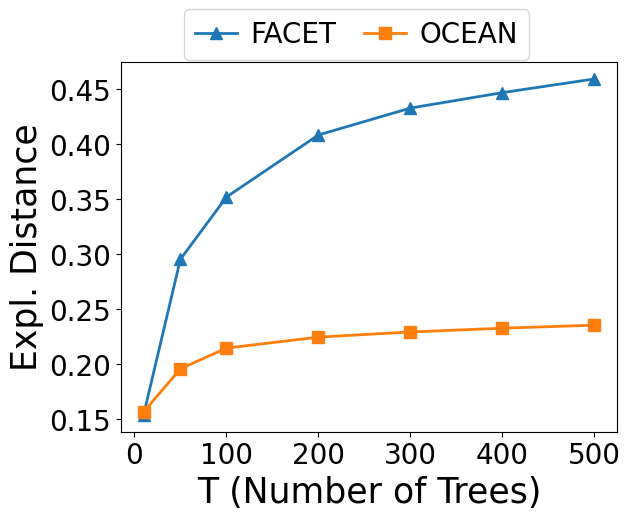

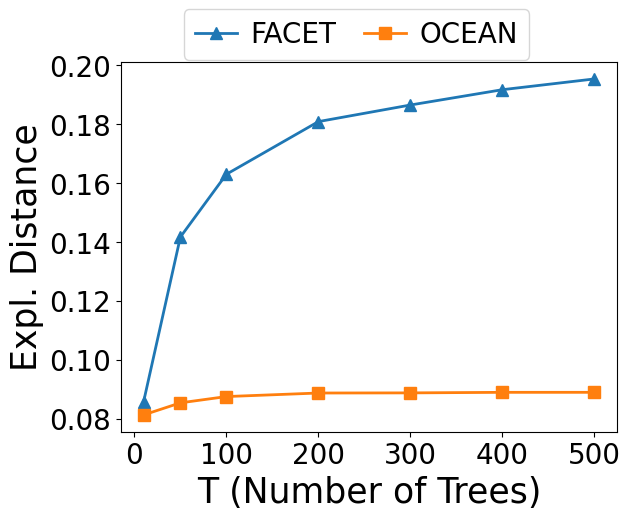

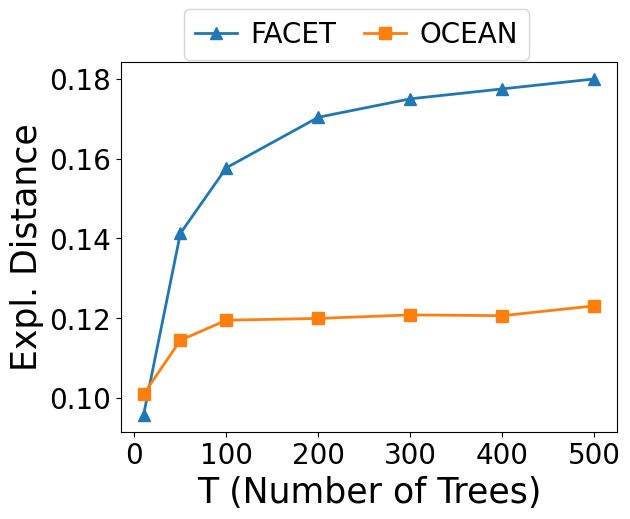

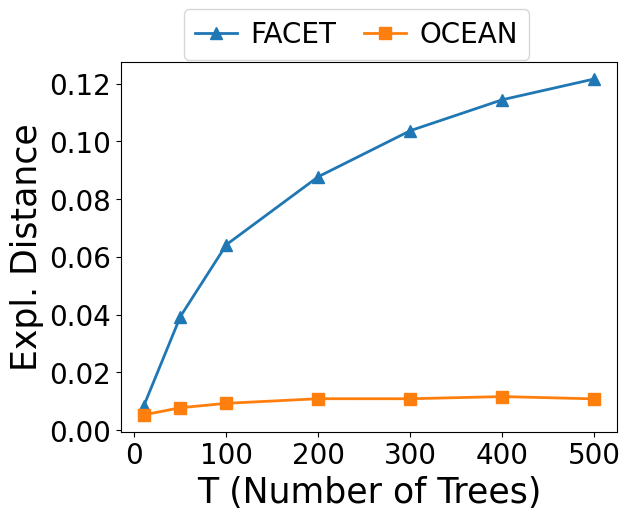

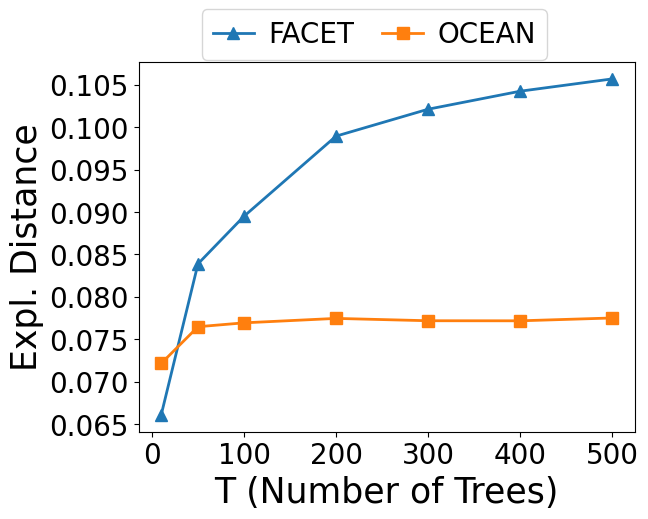

In [111]:
render_plot("n_trees", "avg_dist", "T (Number of Trees)", "Expl. Distance", "Average Distance vs Num Trees", save_name="ntrees_dist")

In [112]:
# render_plot("n_trees", "per_valid", "T (Number of Trees)", "Percent Valid Examples", "Percent Valid Examples vs Num Trees", save_name=None)

In [113]:
# prep time vs number of trees
# render_plot("n_trees", "prep_time", "T (Number of Trees)", "Preproc. Time (sec)", "Prep Time vs Num Trees", save_name="ntrees_tprep")

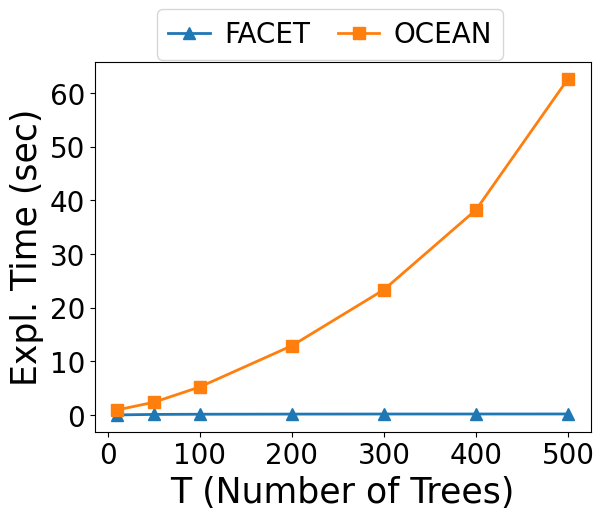

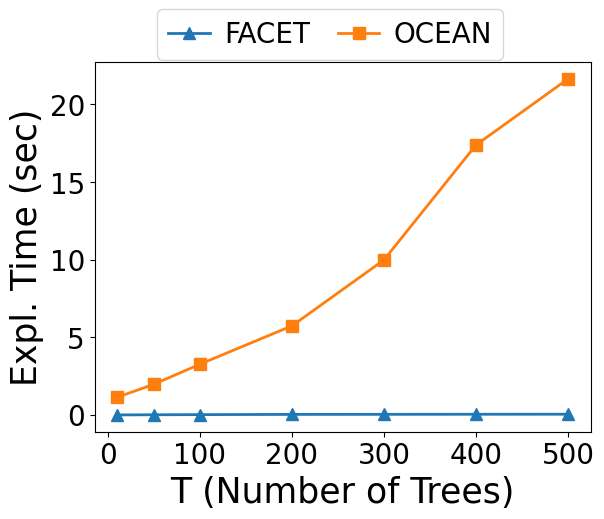

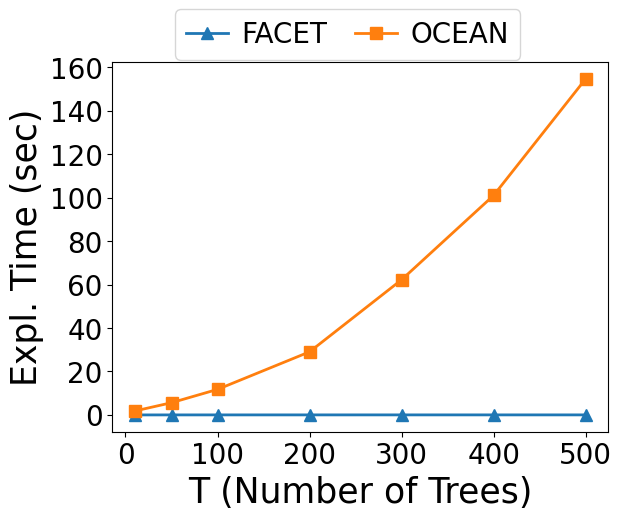

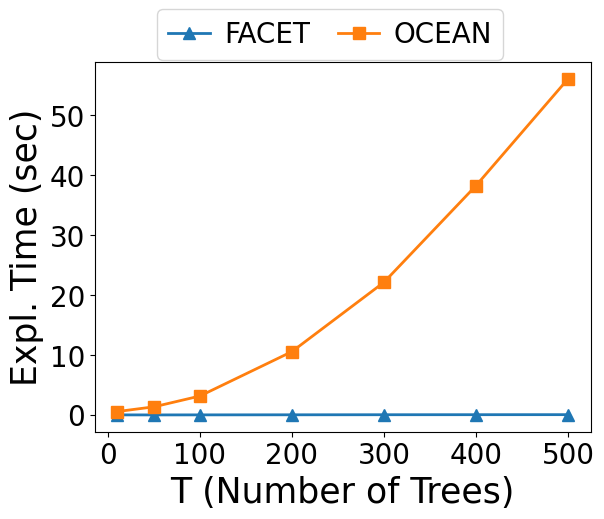

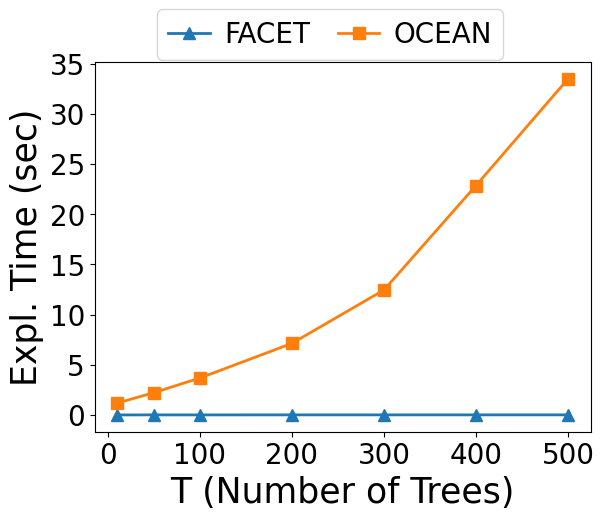

In [114]:
# sample time vs number of trees
render_plot("n_trees", "sample_time", "T (Number of Trees)", "Expl. Time (sec)", "Explanation Time vs Num Trees", save_name="ntrees_texplain", ylog=False) # "sampletime_vs_trees"